In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
train_df = pd.read_csv('/Users/saranyak/Desktop/GT/Fall2023/ComputationalDataAnalytics/Project/GenreClassification/Preprocessing/Output/NotEncoded_Genres_ArtistsEncoded/p%ofgenre/Train.csv')
test_df = pd.read_csv('/Users/saranyak/Desktop/GT/Fall2023/ComputationalDataAnalytics/Project/GenreClassification/Preprocessing/Output/NotEncoded_Genres_ArtistsEncoded/p%ofgenre/Test.csv')

In [3]:
train_df

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,Artists_encoded
0,dance rock,0.105555,0.751000,269446.500000,0.584500,0.218021,0.081650,-8.306000,0.040900,112.381000,0.600000,43.000000,6,1,4,9359
1,classic rock,0.725067,0.457767,239785.333333,0.277103,0.030174,0.208637,-15.235200,0.037757,105.660500,0.428367,40.300000,7,1,60,2346
2,dance pop,0.098400,0.715333,235249.000000,0.726333,0.000025,0.088500,-4.912167,0.166733,107.788500,0.755167,50.000000,8,0,12,340
3,pop punk,0.002519,0.524000,195159.090909,0.840727,0.000042,0.202082,-4.500000,0.058827,146.569182,0.724455,53.909091,2,1,22,1144
4,modern alternative rock,0.028850,0.567000,177192.000000,0.664000,0.000000,0.427000,-5.937000,0.032050,88.241000,0.653500,62.000000,6,1,4,2377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20409,new wave pop,0.417000,0.653000,281800.000000,0.884000,0.000000,0.318000,-10.224000,0.044400,104.647000,0.762000,60.000000,10,1,2,2827
20410,pop punk,0.113909,0.401571,239070.428571,0.875000,0.017223,0.147071,-4.663429,0.083171,168.487286,0.342143,56.000000,8,1,14,993
20411,contemporary post-bop,0.648857,0.457143,318885.571429,0.268471,0.274235,0.120729,-17.155429,0.036986,120.881286,0.465429,23.714286,8,1,14,1128
20412,trap latino,0.229081,0.774269,207925.884615,0.818731,0.000003,0.258658,-5.491731,0.094192,106.636000,0.669269,56.576923,5,1,26,3732


In [8]:
y_train = train_df['genres']
y_train

0                     dance rock
1                   classic rock
2                      dance pop
3                       pop punk
4        modern alternative rock
                  ...           
20409               new wave pop
20410                   pop punk
20411      contemporary post-bop
20412                trap latino
20413                        pop
Name: genres, Length: 20414, dtype: object

In [42]:
X_train=train_df.drop(columns=['genres'])
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,Artists_encoded
0,0.105555,0.751000,269446.500000,0.584500,0.218021,0.081650,-8.306000,0.040900,112.381000,0.600000,43.000000,6,1,4,9359
1,0.725067,0.457767,239785.333333,0.277103,0.030174,0.208637,-15.235200,0.037757,105.660500,0.428367,40.300000,7,1,60,2346
2,0.098400,0.715333,235249.000000,0.726333,0.000025,0.088500,-4.912167,0.166733,107.788500,0.755167,50.000000,8,0,12,340
3,0.002519,0.524000,195159.090909,0.840727,0.000042,0.202082,-4.500000,0.058827,146.569182,0.724455,53.909091,2,1,22,1144
4,0.028850,0.567000,177192.000000,0.664000,0.000000,0.427000,-5.937000,0.032050,88.241000,0.653500,62.000000,6,1,4,2377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20409,0.417000,0.653000,281800.000000,0.884000,0.000000,0.318000,-10.224000,0.044400,104.647000,0.762000,60.000000,10,1,2,2827
20410,0.113909,0.401571,239070.428571,0.875000,0.017223,0.147071,-4.663429,0.083171,168.487286,0.342143,56.000000,8,1,14,993
20411,0.648857,0.457143,318885.571429,0.268471,0.274235,0.120729,-17.155429,0.036986,120.881286,0.465429,23.714286,8,1,14,1128
20412,0.229081,0.774269,207925.884615,0.818731,0.000003,0.258658,-5.491731,0.094192,106.636000,0.669269,56.576923,5,1,26,3732


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

In [45]:
X_to_normalize = X_train.drop(columns=[ 'Artists_encoded'])
X_artists_encoded = X_train['Artists_encoded']

In [46]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_to_normalize), columns=X_to_normalize.columns)

In [19]:
y_test = test_df['genres']
X_test_to_normalize = test_df.drop(columns=['genres', 'Artists_encoded'])
X_test_artists_encoded = test_df['Artists_encoded']

In [49]:

X_val_to_normalize = X_val.drop(columns=[ 'Artists_encoded'])
X_val_artists_encoded = X_val['Artists_encoded']

In [47]:
X_scaled

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,-0.677013,-0.386338,-0.370141,0.474745,-0.465305,-0.250425,0.582755,1.537862,0.783210,-0.028319,0.659633,-0.407489,0.511306,-0.458007
1,0.464250,-0.071595,-0.265798,-0.968094,0.035512,-0.827445,-0.843841,-0.421528,-0.744176,-0.097591,-1.255062,-0.124555,0.511306,-0.327275
2,-0.968740,2.176003,-0.765337,1.048312,-0.465305,-0.465990,0.878569,-0.402807,0.507776,2.112483,1.003432,-0.973358,0.511306,-0.458007
3,-0.809565,-1.114969,-0.246661,0.906747,0.365398,0.994970,0.257960,-0.167842,-0.349254,-0.417653,-0.490947,0.441314,0.511306,-0.080337
4,1.404617,-0.220907,-0.743340,-0.138759,-0.460536,-0.057561,0.184417,-0.385153,-0.772248,0.660117,-1.609440,0.724248,0.511306,-0.472533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,1.990148,0.301119,0.308709,-1.401456,-0.465305,-1.175153,0.062172,-0.561692,-0.016691,-0.562171,0.865912,-0.407489,0.511306,-0.487059
4078,-0.266256,1.209265,-0.195767,0.711320,-0.464263,-0.191072,1.060727,0.134233,0.470588,0.632117,1.072901,0.441314,-1.955776,0.892891
4079,1.420081,-1.993959,-1.164123,-1.369846,-0.462568,-0.319703,-0.763755,-0.644666,-0.411520,-0.831685,-1.550994,0.441314,0.511306,0.064921
4080,-0.675913,1.683386,0.828113,-0.871225,-0.457209,0.225763,-0.195793,2.899735,-1.748833,-0.524424,0.728393,-0.124555,-1.955776,-0.501585


In [48]:
X_combined = pd.concat([X_scaled, X_artists_encoded], axis=1)
X_combined

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,Artists_encoded
0,-0.677013,-0.386338,-0.370141,0.474745,-0.465305,-0.250425,0.582755,1.537862,0.783210,-0.028319,0.659633,-0.407489,0.511306,-0.458007,NaN
1,0.464250,-0.071595,-0.265798,-0.968094,0.035512,-0.827445,-0.843841,-0.421528,-0.744176,-0.097591,-1.255062,-0.124555,0.511306,-0.327275,NaN
2,-0.968740,2.176003,-0.765337,1.048312,-0.465305,-0.465990,0.878569,-0.402807,0.507776,2.112483,1.003432,-0.973358,0.511306,-0.458007,NaN
3,-0.809565,-1.114969,-0.246661,0.906747,0.365398,0.994970,0.257960,-0.167842,-0.349254,-0.417653,-0.490947,0.441314,0.511306,-0.080337,NaN
4,1.404617,-0.220907,-0.743340,-0.138759,-0.460536,-0.057561,0.184417,-0.385153,-0.772248,0.660117,-1.609440,0.724248,0.511306,-0.472533,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4772.0
20400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5152.0
20406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9234.0
20411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1128.0


In [50]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test_to_normalize), columns=X_test_to_normalize.columns)
X_test_combined = pd.concat([X_test_scaled, X_test_artists_encoded], axis=1)

X_val_scaled = pd.DataFrame(scaler.transform(X_val_to_normalize), columns=X_val_to_normalize.columns)
X_val_combined = pd.concat([X_val_scaled, X_val_artists_encoded], axis=1)


In [51]:
X_test_combined

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,Artists_encoded
0,0.339904,-0.136354,-0.206391,0.254666,-0.414228,0.866484,0.344226,-0.578506,0.769213,0.269165,0.923212,1.290117,0.511306,-0.341801,2391
1,1.513656,-0.972576,-0.089215,-1.640552,-0.303535,0.201561,-1.506977,-0.621505,-0.761678,-0.662650,-0.282376,0.441314,0.511306,0.355437,2346
2,-0.619554,-0.532162,-0.758888,0.922552,-0.412478,0.481778,0.858235,0.335505,0.468665,-0.444436,0.350214,-1.539227,0.511306,-0.341801,162
3,0.489832,-0.365506,-1.367792,0.879216,-0.454420,-0.032300,0.621503,-0.495910,0.343801,1.309008,-0.509283,-0.407489,0.511306,-0.167491,8558
4,-1.018431,1.271647,0.558384,1.229305,-0.465305,-1.319545,1.317941,0.073848,-1.494437,1.060956,1.278471,0.724248,0.511306,-0.501585,4243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,-0.771504,-1.175942,0.178496,1.269363,-0.226337,0.201734,0.344485,-0.149978,0.487010,-0.253261,-0.565764,1.573052,0.511306,0.297334,6642
5100,-0.993494,-1.426715,0.051997,1.723847,-0.462056,7.261064,0.582265,0.251648,0.669351,-2.077448,-0.646803,-0.124555,0.511306,-0.487059,577
5101,2.101212,-0.720876,0.076556,-1.678953,-0.464186,-0.562325,-0.290635,-0.537013,0.509070,-1.899497,-0.214598,-0.124555,0.511306,-0.414430,6830
5102,2.480757,-1.794019,-0.071527,-2.869924,3.899163,-1.103379,-5.255554,-0.538501,-0.167622,-1.936682,-0.587012,-1.256293,0.511306,-0.182017,5460


In [52]:
X_val_combined

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,Artists_encoded
0,-1.103281,-0.220907,0.082152,1.453633,0.142419,1.647288,1.195482,-0.068171,0.021452,-0.474543,0.410379,-0.973358,0.511306,-0.283698,9359.0
1,1.296434,-0.458638,-1.314143,-1.674219,0.614472,-1.072917,-1.755624,-0.631047,0.426729,-0.356359,-2.331418,1.007183,0.511306,-0.341801,2346.0
2,0.020857,-0.434129,-0.496917,0.084720,-0.465305,-0.171061,0.695568,0.496912,-0.271449,-0.413878,1.312851,-0.973358,0.511306,-0.487059,340.0
3,2.001385,-1.331604,-1.201842,-1.459956,-0.459790,0.101038,-0.544883,-0.693515,-1.436635,-0.690760,-1.076111,-0.690424,0.511306,1.749913,1144.0
4,-0.870081,0.574080,0.004904,-0.246037,-0.460467,-0.405315,-1.285802,-0.630889,0.161149,1.457974,-0.818702,1.007183,0.511306,-0.283698,2377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2515.0
20408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4494.0
20409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2827.0
20410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,993.0


In [23]:
import numpy as np
np.mean(X_test_combined,axis=0)

acousticness          -0.012767
danceability           0.024601
duration_ms            0.004763
energy                 0.014541
instrumentalness      -0.012567
liveness               0.012505
loudness               0.003102
speechiness            0.031995
tempo                  0.012113
valence                0.013705
popularity             0.006919
key                   -0.010623
mode                   0.033798
count                  0.005408
Artists_encoded     4850.612265
dtype: float64

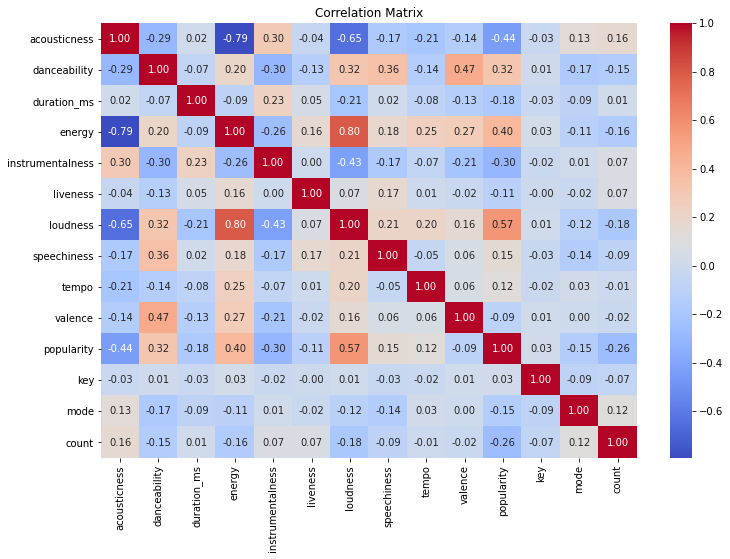

In [26]:
corr_matrix = X_test_scaled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [37]:
corr_matrix = X_combined.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X_selected = X_combined.drop(columns=to_drop)


/Users/saranyak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [38]:
X_selected

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,Artists_encoded
0,-0.748468,1.172881,0.347725,-0.084214,0.710734,-1.107337,0.176411,-0.579461,-0.394457,0.275321,-0.113034,0.150549,0.523188,-0.427923,9359
1,1.537721,-0.958334,-0.083689,-1.661592,-0.302285,0.181967,-1.545131,-0.620158,-0.766278,-0.655589,-0.297626,0.431883,0.523188,0.330429,2346
2,-0.774872,0.913657,-0.149668,0.643591,-0.464875,-1.037788,1.019599,1.049723,-0.648544,1.116919,0.365537,0.713217,-1.911359,-0.319587,340
3,-1.128702,-0.476951,-0.732764,1.230593,-0.464780,0.115415,1.122001,-0.347353,1.497051,0.950341,0.632791,-0.974789,0.523188,-0.184167,1144
4,-1.031533,-0.164428,-0.994091,0.323733,-0.465008,2.399023,0.764982,-0.694043,-1.730036,0.565496,1.185945,0.150549,0.523188,-0.427923,2377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20409,0.400860,0.460619,0.527403,1.452643,-0.465008,1.292340,-0.300111,-0.534146,-0.822352,1.153981,1.049211,1.275886,0.523188,-0.455007,2827
20410,-0.717638,-1.366761,-0.094087,1.406461,-0.372131,-0.443109,1.081398,-0.032166,2.709700,-1.123253,0.775741,0.713217,0.523188,-0.292503,993
20411,1.256484,-0.962868,1.066802,-1.705886,1.013887,-0.710569,-2.022206,-0.630140,0.075833,-0.454572,-1.431548,0.713217,0.523188,-0.292503,1128
20412,-0.292620,1.342002,-0.547075,1.117720,-0.464992,0.689834,0.875608,0.110523,-0.712308,0.651025,0.815184,-0.130786,0.523188,-0.129999,3732


In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your dataset loaded into a DataFrame named 'train_df'
# Extract the target variable

# Initialize and fit a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_combined, y_train)

# Get feature importances
feature_importance = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_combined.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the features and their importances
print("Top Features Selected by Random Forest:")
print(feature_importance_df)


Top Features Selected by Random Forest:
             Feature  Importance
10        popularity    0.083222
7        speechiness    0.081460
0       acousticness    0.081153
2        duration_ms    0.079709
1       danceability    0.079465
9            valence    0.075355
3             energy    0.073872
6           loudness    0.073601
4   instrumentalness    0.069099
8              tempo    0.065385
14   Artists_encoded    0.063092
5           liveness    0.062933
13             count    0.057257
11               key    0.043252
12              mode    0.011145


In [ ]:
X_combined = X_combined.drop(columns=['energy', 'loudness'])